In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog 
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import cmath
import os
import itertools
import glob
import shutil

In [2]:
from zipfile import ZipFile
file_name = "./data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
df = pd.read_csv("Brain Tumor.csv")
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [4]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


df[scalable]=StandardScaler().fit_transform(df[scalable])
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,Image4,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,Image5,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1.338116e-167
3758,Image3759,0,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1.338116e-167
3759,Image3760,0,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1.338116e-167
3760,Image3761,0,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1.338116e-167


c:\Users\amine\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\amine\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of image Homogenity, by Class')

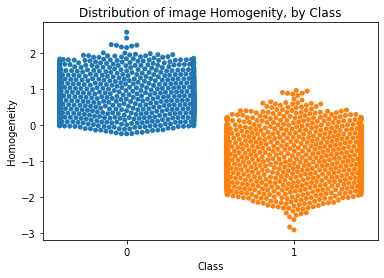

In [5]:
sns.swarmplot(x=df['Class'], y= df['Homogeneity'])
plt.title("Distribution of image Homogenity, by Class")

c:\Users\amine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\amine\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


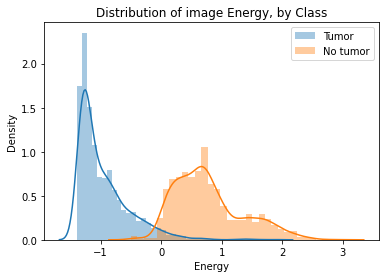

In [6]:
class1=df['Class']== 1
class0=df['Class']== 0
_data=df.copy()
_data=df.drop('Image',axis=1,inplace=False)
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()

Text(0.5, 1.0, 'No Tumor')

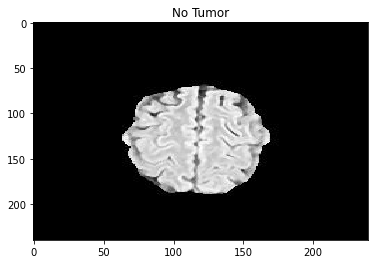

In [7]:
from natsort import natsorted 
fig = plt.figure()  
folder='./Brain Tumor/Brain Tumor/'
imgs=[os.path.join(folder,img) for img in os.listdir(folder) if img.endswith('.jpg')]
imgs=natsorted(imgs)

img=cv.imread(imgs[3760],cv.IMREAD_GRAYSCALE)

im = plt.imshow(img,  interpolation='none', aspect='auto',cmap ='gray', vmin=0, vmax=255)   
plt.title('No Tumor')

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename), as_gray = True)
        if img is not None:
            #img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            images.append(img)
    return images

In [9]:
images_subjet = load_images_from_folder("./Brain Tumor/Brain Tumor/")

In [99]:
def image_resizer (listimage) :
    dim = (320 , 242)
    for i in range(len(listimage)) :
        listimage[i] = cv.resize(listimage[i],dim)
image_resizer(images_subjet[0:1000])

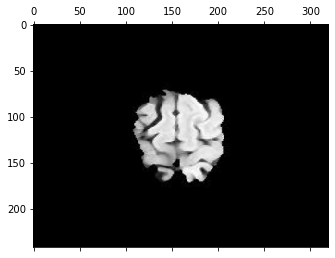

In [117]:
plt.matshow(images_subjet[500],cmap="gray")

In [118]:
def hog_list (listimage) :
    fv = []
    hog_image = []
    for i in range(len(listimage)) :
        a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)
        fv.append(a)
        hog_image.append(b)
    return fv,hog_image

fv_images, hog_images = hog_list(images_subjet[0:1000])

C:\Users\amine\AppData\Local\Temp\ipykernel_23484\4073692141.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  a, b = hog(listimage[i], orientations=9, pixels_per_cell=(8, 8),


1000

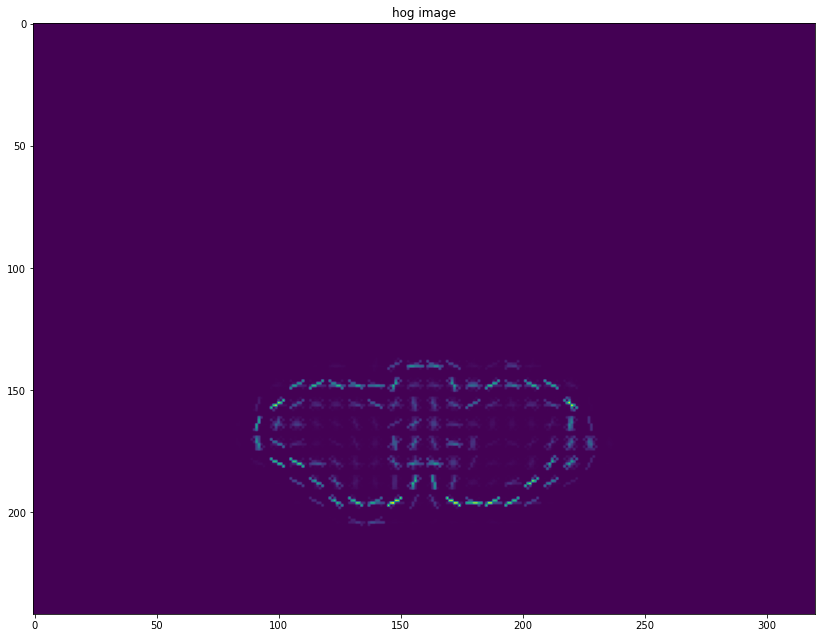

In [101]:
plt.figure(figsize=(14,12))
plt.imshow(hog_images[0]),plt.title("hog image")
len(fv_images)

In [102]:
def etiquetage (listimage, etiquette) :
    etiq = []
    for i in range(len(listimage)) :
        etiq.append(etiquette)
    return etiq

In [121]:
etiq_sujet = etiquetage(images_subjet[0:1000], 1)

In [143]:
fv_images = pd.DataFrame(fv_images)
etiq_images = df["Class"][0:1000]

In [194]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(fv_images, etiq_images, test_size=0.2,random_state=42) 
print("Le nombre d'échantillon d'entrainement = ",fv_train.shape)
print("Le nombre d'échantillon de test = ",fv_test.shape)

Le nombre d'échantillon d'entrainement =  (800, 40716)
Le nombre d'échantillon de test =  (200, 40716)


[0.595, 0.625, 0.64, 0.625, 0.595, 0.595, 0.6, 0.58, 0.615, 0.605, 0.63, 0.63, 0.605, 0.65, 0.67, 0.635, 0.63, 0.61, 0.62, 0.64, 0.635, 0.63, 0.625, 0.65, 0.65]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

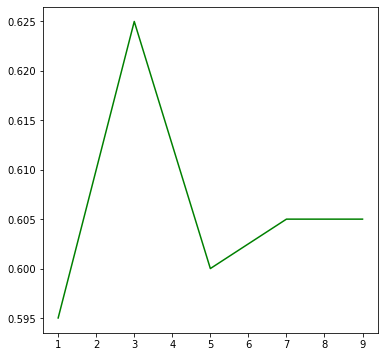

In [145]:
train_test = []
for k in range(1,10,2) :
    for i in range(1,6) : 
        voisin = KNeighborsClassifier(n_neighbors = k, p = i).fit(fv_train,etiq_train)
        ypredict = voisin.predict(fv_test)
        train_test.append(metrics.accuracy_score(etiq_test, ypredict))
print(train_test)

# On va maintenant visualiser les résultats
plt.figure(figsize=(6,6))
plt.plot(range(1,10,2),[train_test[0],train_test[3],train_test[6],train_test[9],train_test[12]],'g', label='Manhattann distance n=1')
plt.plot

In [146]:
voisin = KNeighborsClassifier(n_neighbors = 1, p = 3).fit(fv_train,etiq_train)
ypredict = voisin.predict(fv_test)
print("Confusion Matric : \n")
x = pd.DataFrame(metrics.confusion_matrix(etiq_test, ypredict))
x

Confusion Matric : 



,0,1
0,112,32
1,40,16


<AxesSubplot:title={'center':'Confusion matrix'}>

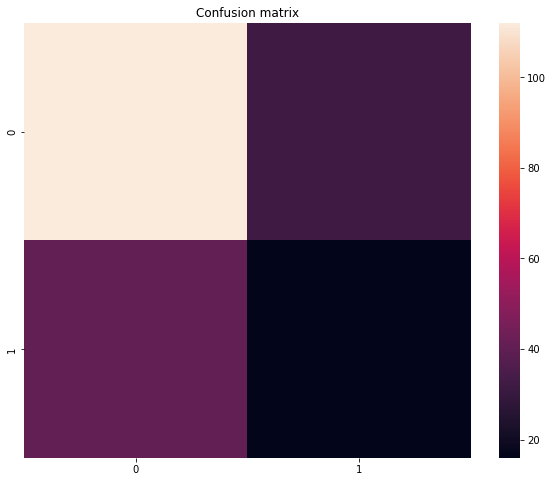

In [147]:
import seaborn as sns
plt.figure(figsize =(10,8)),plt.title("Confusion matrix")
sns.heatmap(x)

In [148]:
# To test the performance of the models used
from sklearn import metrics
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [156]:
parameters = {'n_neighbors':np.arange(1,10,2), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=9)

In [157]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score : ", metrics.f1_score(etiq_test, yknn, average='macro'))
print(metrics.classification_report(etiq_test, yknn))

Accuracy :  0.65
F1-score :  0.4631078386255561
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       133
           1       0.40      0.09      0.15        67

    accuracy                           0.65       200
   macro avg       0.54      0.51      0.46       200
weighted avg       0.58      0.65      0.57       200



In [193]:
mlp = MLPClassifier(solver='sgd', alpha=1e-6, activation='tanh', max_iter = 2500, hidden_layer_sizes=(10,5,3), random_state=42).fit(fv_train,etiq_train)
ymlp = mlp.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ymlp))
print("F1-score : ",metrics.f1_score(etiq_test, ymlp, average='macro'))

Accuracy :  0.7166666666666667
F1-score :  0.4174757281553398


dff = pd.read_csv("Brain Tumor")

In [198]:
dff = pd.read_csv("Brain Tumor.csv")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [199]:
dff.isna().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64